In [2]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
Charter_Schools_Analysis = pd.read_pickle("Charter_Schools_Analysis.pkl")    

Charter_Schools_Analysis2 = Charter_Schools_Analysis[['School_x', 'ANN_TOTAL_ENROLL', 'Pct_White', 'Pct_Male','Pct_ELL', 'Pct_FRPM','year' ,'open_two_years', 'openyear', 'percent_unemployed', 'percent_nohs', 'SOCType', 'County', 
                                                     'Virtual', 'YearRoundYN','Magnet', 'PS_score']]

Charter_Schools_Analysis2['First_School'] = (Charter_Schools_Analysis2.groupby('School_x').cumcount() == 0).astype(int)

Charter_Schools_Analysis2 = Charter_Schools_Analysis2.loc[Charter_Schools_Analysis2['First_School'] > 0]
Charter_Schools_Analysis2 = Charter_Schools_Analysis2.loc[Charter_Schools_Analysis2['openyear'] > 2003]

Charter_Schools_Analysis2['virtual_school'] = np.where(Charter_Schools_Analysis2['Virtual'] == "P", 0, 1) 
Charter_Schools_Analysis2['Year_Round_school'] = np.where(Charter_Schools_Analysis2['YearRoundYN'] == "N", 0, 1)
Charter_Schools_Analysis2['Magnet_school'] = np.where(Charter_Schools_Analysis2['Magnet'] == "N", 0, 1)

Charter_Schools_Analysis2 = Charter_Schools_Analysis2.dropna()

C:\Users\pjciz\.conda\envs\jupyterlab\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
Charter_Schools_Analysis2 = Charter_Schools_Analysis2.reset_index(drop=True)

In [5]:
Charter_Schools_Analysis3 = Charter_Schools_Analysis2.drop(columns=['Virtual', 'YearRoundYN', 'Magnet'])

In [6]:
Charter_Schools_Pre_2017 = Charter_Schools_Analysis3.loc[Charter_Schools_Analysis3['year'] < 17]

In [7]:
X_Pre_2017 = Charter_Schools_Pre_2017.drop(columns=['School_x', 'open_two_years', 'First_School', 'SOCType', 'County'])                                                                   

In [8]:
y_Pre_2017 = Charter_Schools_Pre_2017['open_two_years']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_Pre_2017, y_Pre_2017, test_size=0.4, random_state=42)

In [10]:
sum(y_test)

369.0

In [11]:
len(y_test)

407

Basic Logit

In [12]:
import statsmodels.api as sm

In [13]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

C:\Users\pjciz\.conda\envs\jupyterlab\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
list(X_train.columns)

['const',
 'ANN_TOTAL_ENROLL',
 'Pct_White',
 'Pct_Male',
 'Pct_ELL',
 'Pct_FRPM',
 'year',
 'openyear',
 'percent_unemployed',
 'percent_nohs',
 'PS_score',
 'virtual_school',
 'Year_Round_school',
 'Magnet_school']

In [15]:
results = sm.Logit(y_train, X_train).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.157876
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         open_two_years   No. Observations:                  610
Model:                          Logit   Df Residuals:                      596
Method:                           MLE   Df Model:                           13
Date:                Thu, 02 Jan 2020   Pseudo R-squ.:                  0.4004
Time:                        12:48:53   Log-Likelihood:                -96.305
converged:                       True   LL-Null:                       -160.60
Covariance Type:            nonrobust   LLR p-value:                 3.975e-21
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -457.0818    365.008     -1.252      0.210   -1172.485     258.321
ANN_

In [16]:
predicted_test_logit = results.predict(X_test)

In [17]:
predicted_test_logit = pd.DataFrame(predicted_test_logit)
predicted_test_logit = predicted_test_logit.rename(columns={0: "Score"})

In [18]:
from sklearn import metrics

predicted_test_list_logit = predicted_test_logit.values.tolist()

In [19]:
y_test_np = np.array(y_test)

In [20]:
predicted_test_np = np.array(predicted_test_list_logit)

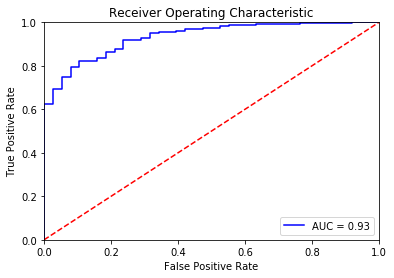

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_np, predicted_test_np)

roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [22]:
!pip install xgboost

In [23]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics  
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [24]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

C:\Users\pjciz\.conda\envs\jupyterlab\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import log_loss

In [26]:
mean_train = np.mean(y_train)

In [27]:
baseline_predictions = np.ones(y_test.shape) * mean_train

In [28]:
baseline_predictions_classified = np.ones(y_test.shape)

In [29]:
accuracy_baseline = log_loss(y_test, baseline_predictions_classified)
print("Baseline accuracy is {:.2f}".format(accuracy_baseline))

Baseline accuracy is 3.22


In [30]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'binary:logistic',
}

In [31]:
params['eval_metric'] = "logloss"

num_boost_round = 999

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.491492
Will train until Test-logloss hasn't improved in 10 rounds.
[1]	Test-logloss:0.380592
[2]	Test-logloss:0.311101
[3]	Test-logloss:0.260881
[4]	Test-logloss:0.231956
[5]	Test-logloss:0.210275
[6]	Test-logloss:0.195137
[7]	Test-logloss:0.182979
[8]	Test-logloss:0.178097
[9]	Test-logloss:0.175582
[10]	Test-logloss:0.176101
[11]	Test-logloss:0.174373
[12]	Test-logloss:0.178542
[13]	Test-logloss:0.176495
[14]	Test-logloss:0.176537
[15]	Test-logloss:0.179199
[16]	Test-logloss:0.181047
[17]	Test-logloss:0.180095
[18]	Test-logloss:0.181798
[19]	Test-logloss:0.182735
[20]	Test-logloss:0.186275
[21]	Test-logloss:0.190869
Stopping. Best iteration:
[11]	Test-logloss:0.174373



In [32]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'logloss'},
    early_stopping_rounds=10
)
cv_results

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.479403,0.003476,0.497627,0.008621
1,0.354388,0.003062,0.389538,0.014498
2,0.273082,0.003234,0.319224,0.014864
3,0.216800,0.003517,0.278538,0.017802
4,0.176087,0.003087,0.245629,0.016775
5,0.146742,0.003814,0.227066,0.018346
6,0.124181,0.003503,0.214481,0.017834
7,0.106991,0.003623,0.204432,0.019156
8,0.093269,0.003611,0.197657,0.018527
9,0.082560,0.003264,0.197106,0.019932


In [33]:
cv_results['test-logloss-mean'].min()

0.1952188

In [34]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(1,12)
    for min_child_weight in range(1,8)
]

In [35]:
# Define initial best params and MAE
min_error = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss'},
        early_stopping_rounds=10
    )
    # Update best error
    mean_error = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with max_depth=1, min_child_weight=1


C:\Users\pjciz\.conda\envs\jupyterlab\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	Error 0.17313679999999998 for 66 rounds
CV with max_depth=1, min_child_weight=2
	Error 0.1765888 for 77 rounds
CV with max_depth=1, min_child_weight=3
	Error 0.1780988 for 78 rounds
CV with max_depth=1, min_child_weight=4
	Error 0.1749266 for 67 rounds
CV with max_depth=1, min_child_weight=5
	Error 0.17986699999999997 for 63 rounds
CV with max_depth=1, min_child_weight=6
	Error 0.1848648 for 48 rounds
CV with max_depth=1, min_child_weight=7
	Error 0.18527159999999998 for 58 rounds
CV with max_depth=2, min_child_weight=1
	Error 0.17412840000000002 for 18 rounds
CV with max_depth=2, min_child_weight=2
	Error 0.1740764 for 14 rounds
CV with max_depth=2, min_child_weight=3
	Error 0.1763538 for 25 rounds
CV with max_depth=2, min_child_weight=4
	Error 0.1785124 for 28 rounds
CV with max_depth=2, min_child_weight=5
	Error 0.1814714 for 28 rounds
CV with max_depth=2, min_child_weight=6
	Error 0.18510360000000003 for 19 rounds
CV with max_depth=2, min_child_weight=7
	Error 0.19081019999999999 

In [36]:
params['max_depth'] = 3
params['min_child_weight'] = 1

In [37]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(1,11)]
    for colsample in [i/10. for i in range(1,11)]
]

In [38]:
min_error = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_error = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (subsample,colsample)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with subsample=1.0, colsample=1.0
	Error 0.1714164 for 16 rounds
CV with subsample=1.0, colsample=0.9


C:\Users\pjciz\.conda\envs\jupyterlab\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	Error 0.16907719999999998 for 21 rounds
CV with subsample=1.0, colsample=0.8
	Error 0.1736634 for 16 rounds
CV with subsample=1.0, colsample=0.7
	Error 0.167784 for 15 rounds
CV with subsample=1.0, colsample=0.6
	Error 0.16344660000000003 for 16 rounds
CV with subsample=1.0, colsample=0.5
	Error 0.1654606 for 15 rounds
CV with subsample=1.0, colsample=0.4
	Error 0.1775202 for 23 rounds
CV with subsample=1.0, colsample=0.3
	Error 0.1790968 for 28 rounds
CV with subsample=1.0, colsample=0.2
	Error 0.1930114 for 27 rounds
CV with subsample=1.0, colsample=0.1
	Error 0.2023114 for 49 rounds
CV with subsample=0.9, colsample=1.0
	Error 0.17588620000000002 for 18 rounds
CV with subsample=0.9, colsample=0.9
	Error 0.1746396 for 13 rounds
CV with subsample=0.9, colsample=0.8
	Error 0.1749232 for 15 rounds
CV with subsample=0.9, colsample=0.7
	Error 0.1749514 for 15 rounds
CV with subsample=0.9, colsample=0.6
	Error 0.17098139999999998 for 16 rounds
CV with subsample=0.9, colsample=0.5
	Error 0.

In [39]:
params['subsample'] = 1.0
params['colsample_bytree'] = 0.6

In [40]:
%time
# This can take some time…
min_error = float("Inf")
best_params = None
for eta in [.9, .8, .7, .6, .5, .4, .3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round, seed=42, nfold=5, metrics=['logloss'],early_stopping_rounds=10)
    # Update best score
    mean_error = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = eta
print("Best params: {}, Error: {}".format(best_params, min_error))

Wall time: 0 ns
CV with eta=0.9
Wall time: 67.8 ms
	MAE 0.1874196 for 2 rounds

CV with eta=0.8
Wall time: 65.8 ms
	MAE 0.1895082 for 3 rounds

CV with eta=0.7


C:\Users\pjciz\.conda\envs\jupyterlab\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


Wall time: 76.8 ms
	MAE 0.17774240000000002 for 6 rounds

CV with eta=0.6
Wall time: 96.7 ms
	MAE 0.17046820000000001 for 9 rounds

CV with eta=0.5
Wall time: 98.7 ms
	MAE 0.1777718 for 12 rounds

CV with eta=0.4
Wall time: 120 ms
	MAE 0.16834239999999998 for 16 rounds

CV with eta=0.3
Wall time: 116 ms
	MAE 0.16344660000000003 for 16 rounds

CV with eta=0.2
Wall time: 166 ms
	MAE 0.1690064 for 27 rounds

CV with eta=0.1
Wall time: 313 ms
	MAE 0.1665906 for 54 rounds

CV with eta=0.05
Wall time: 516 ms
	MAE 0.16993460000000002 for 101 rounds

CV with eta=0.01
Wall time: 2.16 s
	MAE 0.17145419999999997 for 476 rounds

CV with eta=0.005
Wall time: 3.96 s
	MAE 0.17109819999999998 for 957 rounds

Best params: 0.3, Error: 0.16344660000000003


In [41]:
params['eta'] = .3

In [42]:
params

{'max_depth': 3,
 'min_child_weight': 1,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 0.6,
 'objective': 'binary:logistic',
 'eval_metric': 'logloss'}

In [43]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.49459
Will train until Test-logloss hasn't improved in 10 rounds.
[1]	Test-logloss:0.40031
[2]	Test-logloss:0.331848
[3]	Test-logloss:0.282154
[4]	Test-logloss:0.25927
[5]	Test-logloss:0.242229
[6]	Test-logloss:0.236609
[7]	Test-logloss:0.219609
[8]	Test-logloss:0.216826
[9]	Test-logloss:0.202279
[10]	Test-logloss:0.190738
[11]	Test-logloss:0.187148
[12]	Test-logloss:0.191335
[13]	Test-logloss:0.184925
[14]	Test-logloss:0.185383
[15]	Test-logloss:0.179083
[16]	Test-logloss:0.174071
[17]	Test-logloss:0.170338
[18]	Test-logloss:0.174187
[19]	Test-logloss:0.174968
[20]	Test-logloss:0.174477
[21]	Test-logloss:0.175011
[22]	Test-logloss:0.173658
[23]	Test-logloss:0.173706
[24]	Test-logloss:0.176299
[25]	Test-logloss:0.178898
[26]	Test-logloss:0.180371
[27]	Test-logloss:0.181153
Stopping. Best iteration:
[17]	Test-logloss:0.170338



In [44]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-logloss:0.49459
[1]	Test-logloss:0.40031
[2]	Test-logloss:0.331848
[3]	Test-logloss:0.282154
[4]	Test-logloss:0.25927
[5]	Test-logloss:0.242229
[6]	Test-logloss:0.236609
[7]	Test-logloss:0.219609
[8]	Test-logloss:0.216826
[9]	Test-logloss:0.202279
[10]	Test-logloss:0.190738
[11]	Test-logloss:0.187148
[12]	Test-logloss:0.191335
[13]	Test-logloss:0.184925
[14]	Test-logloss:0.185383
[15]	Test-logloss:0.179083
[16]	Test-logloss:0.174071
[17]	Test-logloss:0.170338


In [45]:
best_model.save_model("my_model.model")

In [46]:
y_test_np = np.array(y_test)

In [47]:
x_np = np.array(best_model.predict(dtest))

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_np, x_np)

roc_auc = metrics.auc(fpr, tpr)

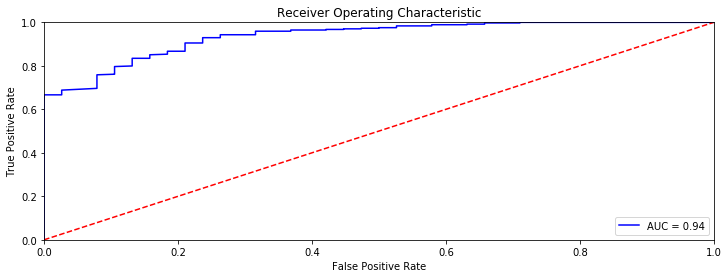

In [49]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
y_pred_xgb = np.where(x_np > .8, 1, 0) 

In [52]:
confusion_matrix(y_test_np, y_pred_xgb)

array([[ 26,  12],
       [ 15, 354]], dtype=int64)

In [53]:
y_pred_logit = np.where(predicted_test_logit > .8, 1,0)

In [54]:
confusion_matrix(y_test_np, y_pred_logit)

array([[ 27,  11],
       [ 26, 343]], dtype=int64)

In [55]:
Charter_Schools_Post_2016 = Charter_Schools_Analysis3.loc[Charter_Schools_Analysis3['year'] > 16]

In [56]:
X_Post_2016 = Charter_Schools_Post_2016.drop(columns=['School_x', 'open_two_years', 'First_School', 'SOCType', 'County'])      

In [57]:
X_Post_2016.head()

,ANN_TOTAL_ENROLL,Pct_White,Pct_Male,Pct_ELL,Pct_FRPM,year,openyear,percent_unemployed,percent_nohs,PS_score,virtual_school,Year_Round_school,Magnet_school
26,106.0,0.415094,0.584906,0.028302,0.245283,17.0,2017.0,8.856607,14.210810,3.939818,1,0,0
27,23.0,0.043478,0.304348,0.173913,0.086957,17.0,2017.0,16.659632,38.802968,3.957713,1,1,0
34,52.0,0.038462,0.519231,0.346154,0.750000,18.0,2018.0,16.659632,38.802968,3.956446,1,0,0
35,91.0,0.000000,0.505495,0.219780,0.890110,18.0,2018.0,16.137931,41.337299,3.935906,1,0,0
45,383.0,0.044386,0.480418,0.221932,0.613577,18.0,2018.0,9.243006,12.019013,4.171997,1,0,0


In [58]:
import statsmodels.api as sm

In [59]:
X_Post_2016['const'] = 1

In [60]:
X_Post_2016 = X_Post_2016[['const', 'ANN_TOTAL_ENROLL', 'Pct_White', 'Pct_Male', 'Pct_ELL', 'Pct_FRPM', 'year',
                           'openyear', 'percent_unemployed', 'percent_nohs', 'PS_score', 'virtual_school',
                           'Year_Round_school', 'Magnet_school']]

In [61]:
d_predict = xgb.DMatrix(X_Post_2016)

In [62]:
Predicted_Post_2016 = best_model.predict(d_predict)

In [63]:
Predicted_Post_2016[0:5]

array([0.9071579 , 0.80295205, 0.91688186, 0.94299734, 0.96599644],
      dtype=float32)

In [64]:
Charter_Schools_Post_2016.head()

,School_x,ANN_TOTAL_ENROLL,Pct_White,Pct_Male,Pct_ELL,Pct_FRPM,year,open_two_years,openyear,percent_unemployed,percent_nohs,SOCType,County,PS_score,First_School,virtual_school,Year_Round_school,Magnet_school
26,Connecting Waters Charter - East Bay,106.0,0.415094,0.584906,0.028302,0.245283,17.0,0.0,2017.0,8.856607,14.210810,K-12 Schools (Public),Alameda,3.939818,1,1,0,0
27,Opportunity Academy,23.0,0.043478,0.304348,0.173913,0.086957,17.0,0.0,2017.0,16.659632,38.802968,County Community,Alameda,3.957713,1,1,1,0
34,Latitude 37.8 High,52.0,0.038462,0.519231,0.346154,0.750000,18.0,0.0,2018.0,16.659632,38.802968,High Schools In 1 School Dist. (Public),Alameda,3.956446,1,1,0,0
35,Aurum Preparatory Academy,91.0,0.000000,0.505495,0.219780,0.890110,18.0,0.0,2018.0,16.137931,41.337299,Junior High Schools (Public),Alameda,3.935906,1,1,0,0
45,REALM Charter,383.0,0.044386,0.480418,0.221932,0.613577,18.0,0.0,2018.0,9.243006,12.019013,K-12 Schools (Public),Alameda,4.171997,1,1,0,0


In [65]:
Charter_Schools_Post_2016['predicted_survival'] = Predicted_Post_2016

C:\Users\pjciz\.conda\envs\jupyterlab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
Charter_Schools_Post_2016.head()

,School_x,ANN_TOTAL_ENROLL,Pct_White,Pct_Male,Pct_ELL,Pct_FRPM,year,open_two_years,openyear,percent_unemployed,percent_nohs,SOCType,County,PS_score,First_School,virtual_school,Year_Round_school,Magnet_school,predicted_survival
26,Connecting Waters Charter - East Bay,106.0,0.415094,0.584906,0.028302,0.245283,17.0,0.0,2017.0,8.856607,14.210810,K-12 Schools (Public),Alameda,3.939818,1,1,0,0,0.907158
27,Opportunity Academy,23.0,0.043478,0.304348,0.173913,0.086957,17.0,0.0,2017.0,16.659632,38.802968,County Community,Alameda,3.957713,1,1,1,0,0.802952
34,Latitude 37.8 High,52.0,0.038462,0.519231,0.346154,0.750000,18.0,0.0,2018.0,16.659632,38.802968,High Schools In 1 School Dist. (Public),Alameda,3.956446,1,1,0,0,0.916882
35,Aurum Preparatory Academy,91.0,0.000000,0.505495,0.219780,0.890110,18.0,0.0,2018.0,16.137931,41.337299,Junior High Schools (Public),Alameda,3.935906,1,1,0,0,0.942997
45,REALM Charter,383.0,0.044386,0.480418,0.221932,0.613577,18.0,0.0,2018.0,9.243006,12.019013,K-12 Schools (Public),Alameda,4.171997,1,1,0,0,0.965996


In [67]:
Charter_Schools_Post_2016['Safe'] = np.where(Charter_Schools_Post_2016['predicted_survival'] > .8, "Safe", "Risky")

C:\Users\pjciz\.conda\envs\jupyterlab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
Charter_Schools_Post_2016_Out = Charter_Schools_Post_2016[['School_x', 'predicted_survival', 'Safe']]

In [69]:
Charter_Schools_Post_2016_Out.head()

,School_x,predicted_survival,Safe
26,Connecting Waters Charter - East Bay,0.907158,Safe
27,Opportunity Academy,0.802952,Safe
34,Latitude 37.8 High,0.916882,Safe
35,Aurum Preparatory Academy,0.942997,Safe
45,REALM Charter,0.965996,Safe


In [70]:
Charter_Schools_Analysis.head()

,CDS_CODE,NCESDist,NCESSchool,StatusType,County,District,School_x,Street,StreetAbr,City,...,zipcode1,zipcode2,zipcode,percent_unemployed,percent_nohs,openyear,ncesId,Pct_ELL,Pct_FRPM,PS_score
0,01100170109835,0691051,10546,Closed,Alameda,Alameda County Office of Education,FAME Public Charter,"39899 Balentine Drive, Suite 335","39899 Balentine Dr., Ste. 335",Newark,...,94560,94560,94560.0,8.588326,12.347434,2005.0,069105110546,0.308280,0.442321,3.891167
1,01100170109835,0691051,10546,Closed,Alameda,Alameda County Office of Education,FAME Public Charter,"39899 Balentine Drive, Suite 335","39899 Balentine Dr., Ste. 335",Newark,...,94560,94560,94560.0,8.588326,12.347434,2005.0,069105110546,0.335958,0.442321,3.891167
2,01100170109835,0691051,10546,Closed,Alameda,Alameda County Office of Education,FAME Public Charter,"39899 Balentine Drive, Suite 335","39899 Balentine Dr., Ste. 335",Newark,...,94560,94560,94560.0,8.588326,12.347434,2005.0,069105110546,0.413823,0.416448,3.891167
3,01100170109835,0691051,10546,Closed,Alameda,Alameda County Office of Education,FAME Public Charter,"39899 Balentine Drive, Suite 335","39899 Balentine Dr., Ste. 335",Newark,...,94560,94560,94560.0,8.588326,12.347434,2005.0,069105110546,0.262518,0.341202,3.891167
4,01100170109835,0691051,10546,Closed,Alameda,Alameda County Office of Education,FAME Public Charter,"39899 Balentine Drive, Suite 335","39899 Balentine Dr., Ste. 335",Newark,...,94560,94560,94560.0,8.588326,12.347434,2005.0,069105110546,0.252259,0.364837,3.891167


In [83]:
Charter_Schools_Post_2016_Out2 = Charter_Schools_Analysis[['School_x', 'ANN_TOTAL_ENROLL', 'year', 'Latitude_x', 'Longitude_x', 'CDS_CODE']]

In [84]:
Charter_Schools_Post_2016_Out2.head()

,School_x,ANN_TOTAL_ENROLL,year,Latitude_x,Longitude_x,CDS_CODE
0,FAME Public Charter,785.0,5.0,37.521436,-121.99391,01100170109835
1,FAME Public Charter,1143.0,6.0,37.521436,-121.99391,01100170109835
2,FAME Public Charter,1143.0,7.0,37.521436,-121.99391,01100170109835
3,FAME Public Charter,1398.0,8.0,37.521436,-121.99391,01100170109835
4,FAME Public Charter,1439.0,9.0,37.521436,-121.99391,01100170109835


In [85]:
Charter_Schools_Post_2016_Out2['First_School'] = (Charter_Schools_Post_2016_Out2.groupby('School_x').cumcount() == 0).astype(int)                                                                

C:\Users\pjciz\.conda\envs\jupyterlab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
Charter_Schools_Post_2016_Out2.head()

,School_x,ANN_TOTAL_ENROLL,year,Latitude_x,Longitude_x,CDS_CODE,First_School
0,FAME Public Charter,785.0,5.0,37.521436,-121.99391,01100170109835,1
1,FAME Public Charter,1143.0,6.0,37.521436,-121.99391,01100170109835,0
2,FAME Public Charter,1143.0,7.0,37.521436,-121.99391,01100170109835,0
3,FAME Public Charter,1398.0,8.0,37.521436,-121.99391,01100170109835,0
4,FAME Public Charter,1439.0,9.0,37.521436,-121.99391,01100170109835,0


In [87]:
Charter_Schools_Post_2016_Out2 = Charter_Schools_Post_2016_Out2.loc[Charter_Schools_Post_2016_Out2['First_School'] > 0]

In [88]:
Charter_Schools_Post_2016_Out2 = Charter_Schools_Post_2016_Out2.loc[Charter_Schools_Post_2016_Out2['year'] > 16]

In [89]:
Charter_Schools_Post_2016_Out2.head()

,School_x,ANN_TOTAL_ENROLL,year,Latitude_x,Longitude_x,CDS_CODE,First_School
266,Connecting Waters Charter - East Bay,106.0,17.0,37.603623,-122.02530,01100170136101,1
268,Opportunity Academy,23.0,17.0,37.783496,-122.23538,01100170136226,1
368,Latitude 37.8 High,52.0,18.0,37.777138,-122.23001,01771800138289,1
369,Aurum Preparatory Academy,91.0,18.0,37.758631,-122.19604,01100170137448,1
528,REALM Charter,383.0,18.0,37.867407,-122.29489,01611430138552,1


In [90]:
Charter_Schools_Analysis_Out = Charter_Schools_Post_2016_Out.merge(Charter_Schools_Post_2016_Out2, left_on='School_x', right_on='School_x')

In [91]:
Charter_Schools_Analysis_Out.head()

,School_x,predicted_survival,Safe,ANN_TOTAL_ENROLL,year,Latitude_x,Longitude_x,CDS_CODE,First_School
0,Connecting Waters Charter - East Bay,0.907158,Safe,106.0,17.0,37.603623,-122.02530,01100170136101,1
1,Opportunity Academy,0.802952,Safe,23.0,17.0,37.783496,-122.23538,01100170136226,1
2,Latitude 37.8 High,0.916882,Safe,52.0,18.0,37.777138,-122.23001,01771800138289,1
3,Aurum Preparatory Academy,0.942997,Safe,91.0,18.0,37.758631,-122.19604,01100170137448,1
4,REALM Charter,0.965996,Safe,383.0,18.0,37.867407,-122.29489,01611430138552,1


In [92]:
Charter_Schools_Analysis_Out = Charter_Schools_Analysis_Out.rename(columns={ "School_x" : "School", "Latitude_x" : "Latitude", "Longitude_x": "Longitude"})

In [93]:
Charter_Schools_Analysis_Out.head()

,School,predicted_survival,Safe,ANN_TOTAL_ENROLL,year,Latitude,Longitude,CDS_CODE,First_School
0,Connecting Waters Charter - East Bay,0.907158,Safe,106.0,17.0,37.603623,-122.02530,01100170136101,1
1,Opportunity Academy,0.802952,Safe,23.0,17.0,37.783496,-122.23538,01100170136226,1
2,Latitude 37.8 High,0.916882,Safe,52.0,18.0,37.777138,-122.23001,01771800138289,1
3,Aurum Preparatory Academy,0.942997,Safe,91.0,18.0,37.758631,-122.19604,01100170137448,1
4,REALM Charter,0.965996,Safe,383.0,18.0,37.867407,-122.29489,01611430138552,1


In [94]:
Charter_Schools_Analysis_Out = Charter_Schools_Analysis_Out[['School', 'ANN_TOTAL_ENROLL', 'CDS_CODE', 'predicted_survival', 'Safe', 'Latitude', 'Longitude']]

In [95]:
Charter_Schools_Analysis_Out[150:200]

,School,ANN_TOTAL_ENROLL,CDS_CODE,predicted_survival,Safe,Latitude,Longitude
150,Trivium Charter School Voyage,203.0,42691120137885,0.913268,Safe,34.437201,-119.78106
151,Uplift California Santa Barbara,463.0,42750100135590,0.749107,Risky,34.935346,-119.61483
152,Olive Grove Charter - Buellton,83.0,42772140138388,0.919970,Safe,34.609844,-120.18716
153,Olive Grove Charter - Santa Barbara,180.0,42772220138396,0.883950,Safe,34.401386,-119.72405
154,KIPP Navigate College Prep,89.0,43771490137315,0.916820,Safe,37.252798,-121.81957
155,Legacy Academy,13.0,43104390136655,0.909536,Safe,37.338809,-121.87912
156,Campbell School of Innovation,300.0,43693930137273,0.935312,Safe,37.283434,-121.95556
157,Santa Cruz County Career Advancement Charter,48.0,44104470136572,0.916882,Safe,36.938323,-121.77174
158,Tree of Life International Charter,87.0,45699140135624,0.958651,Safe,40.466409,-122.33277
159,PACE Academy Charter,83.0,45699710135830,0.958651,Safe,40.561832,-122.35690


In [96]:
Charter_Schools_Analysis_Out.to_pickle("Charter_Schools_Analysis_Out.pkl")